# Group work


### Research questions:

Which factors are causing heart diseases? --> Insight which tests should be carried out and which not.
Does some age category has smaller risk for hear diseases? -> Would it be beneficial to leave some age categories out?




### Importing libraries


In [216]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

import pandas as pd #data frames (for storing data)
import numpy as np #scientific computing
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

import seaborn as sns # for correlation plot


### Importing data

In [7]:
data = pd.read_csv('heart.csv')
data.head().style #Call the head() function to see how the dataset looks (.style() shows all columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Explanatory Data Analysis


In [206]:
data.info()  #No NAs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
# Print the dimensions of the original data
print("Dimensions of original data:", data.shape)


Dimensions of original data: (303, 14)


## Visualizing the data
Visualization what propotion of measurements has disease and which doesn't

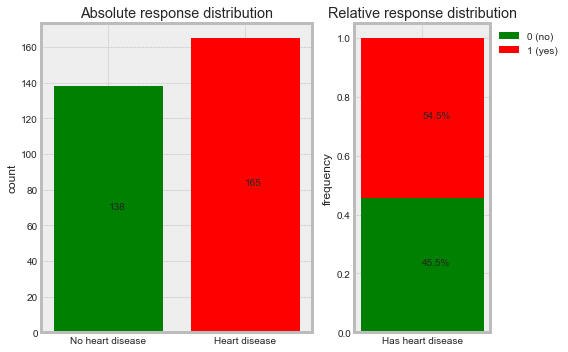

In [92]:
# plot response
keys, counts = np.unique(data.target, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['No heart disease', 'Heart disease'], counts, color=['g','r']) #left bar plot
ax0 = plt.title('Absolute response distribution') 
ax0 = plt.ylabel('count')
ax0 = plt.text(keys[0], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(keys[1], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Has heart disease'], [counts_norm[0]], label='0 (no)', color = "g")
ax1 = plt.bar(['Has heart disease'], [counts_norm[1]], bottom=counts_norm[0], label='1 (yes)', color = "r")
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Relative response distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Has heart disease'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Has heart disease'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

The data is quite equally distributed 54.5 has and 45.5 hasn't got a disease

### Visualization heart disease frequency for different age groups

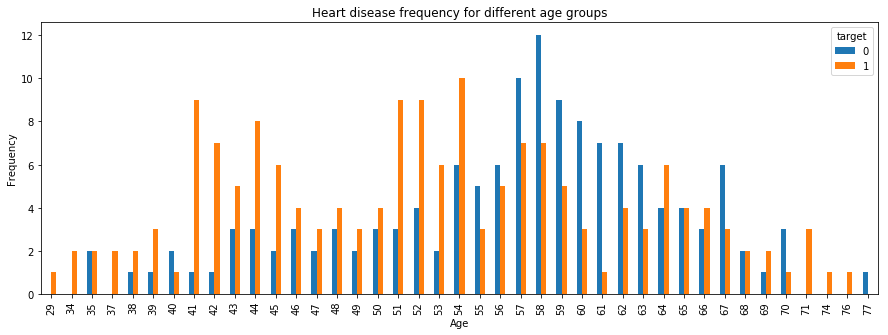

In [20]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart disease frequency for different age groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### There probably isn't any usage for this...
Histograms for all variables having more than two value options

In [72]:
plt.style.use('bmh')

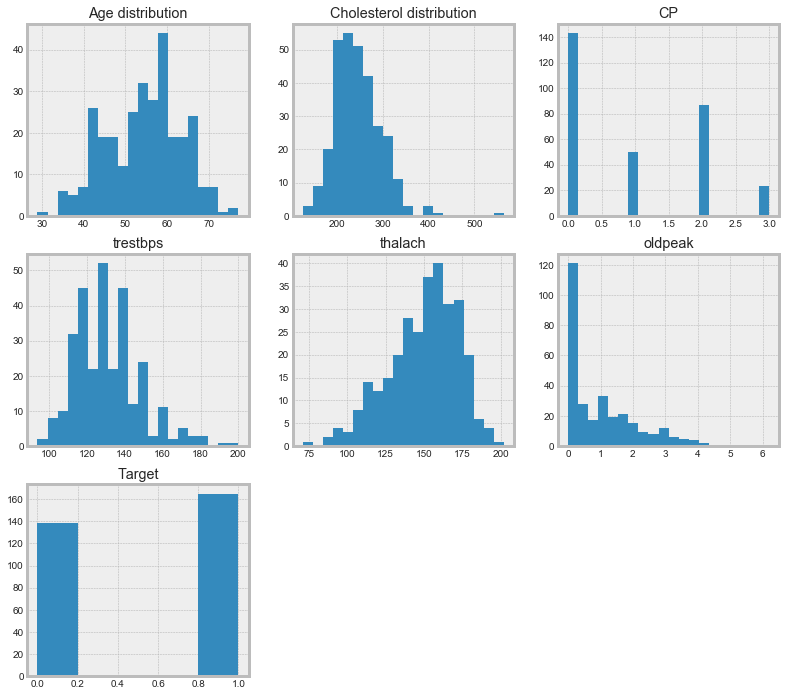

In [96]:
plt.figure(1 , figsize = (12 , 12))
plt.subplot(3,3,1)
plt.hist(data.age, bins = 20)
plt.title("Age distribution")

plt.subplot(3,3,2)
plt.hist(data.chol, bins = 20)
plt.title("Cholesterol distribution")

plt.subplot(3,3,3)
plt.hist(data.cp, bins = 20)
plt.title("CP")

plt.subplot(3,3,4)
plt.hist(data.trestbps, bins = 20)
plt.title("trestbps")

plt.subplot(3,3,5)
plt.hist(data.thalach, bins = 20)
plt.title("thalach")

plt.subplot(3,3,6)
plt.hist(data.oldpeak, bins = 20)
plt.title("oldpeak")


plt.subplot(3,3,7)
plt.hist(data.target, bins = 5)
plt.title("Target")

plt.show()

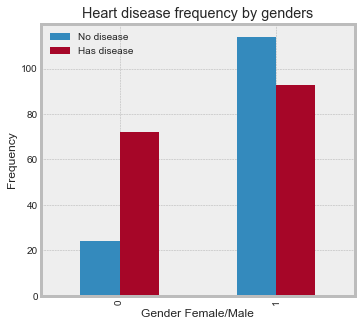

In [210]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(5,5)) 
plt.title('Heart disease frequency by genders')
plt.xlabel('Gender Female/Male')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])

plt.show()

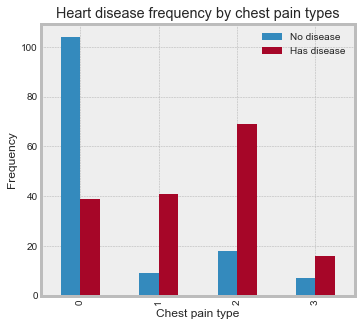

In [188]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(5,5)) 
plt.title('Heart disease frequency by chest pain types')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

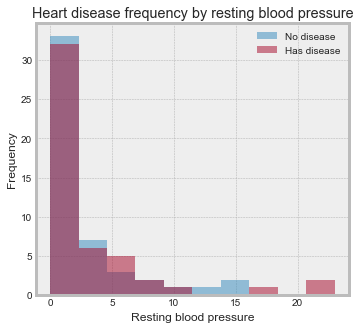

In [185]:
pd.crosstab(data.trestbps,data.target).plot(kind="hist",figsize=(5,5), alpha = 0.5) 
plt.title('Heart disease frequency by resting blood pressure')
plt.xlabel('Resting blood pressure')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

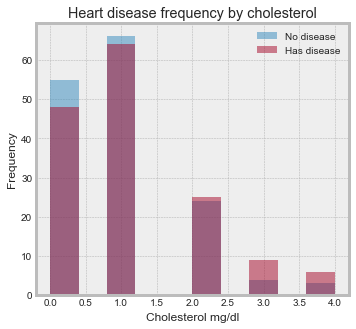

In [189]:
pd.crosstab(data.chol,data.target).plot(kind="hist",figsize=(5,5), alpha = 0.5) 
plt.title('Heart disease frequency by cholesterol')
plt.xlabel('Cholesterol mg/dl')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

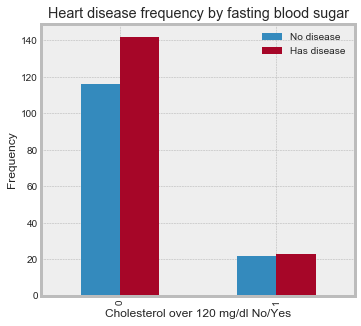

In [198]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(5,5), alpha = 1) 
plt.title('Heart disease frequency by fasting blood sugar') #1 is yes
plt.xlabel('Cholesterol over 120 mg/dl No/Yes')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

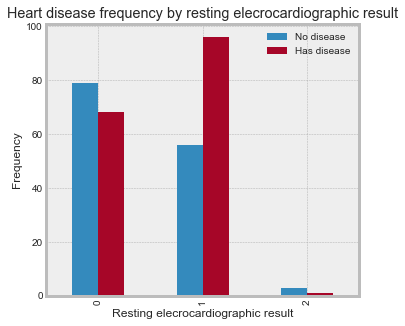

In [191]:
pd.crosstab(data.restecg,data.target).plot(kind="bar",figsize=(5,5), alpha = 1) 
plt.title('Heart disease frequency by resting elecrocardiographic result') #1 is yes
plt.xlabel('Resting elecrocardiographic result')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

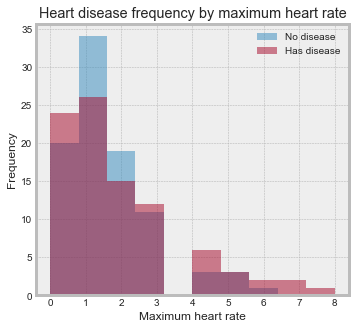

In [195]:
pd.crosstab(data.thalach,data.target).plot(kind="hist",figsize=(5,5), alpha = 0.5) 
plt.title('Heart disease frequency by maximum heart rate')
plt.xlabel('Maximum heart rate')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

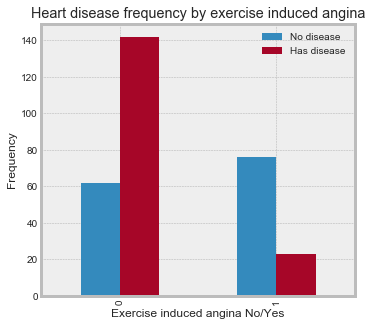

In [197]:
pd.crosstab(data.exang,data.target).plot(kind="bar",figsize=(5,5), alpha = 1) 
plt.title('Heart disease frequency by exercise induced angina') #1 is yes
plt.xlabel('Exercise induced angina No/Yes')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

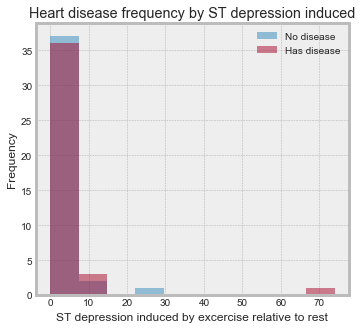

In [213]:
pd.crosstab(data.oldpeak,data.target).plot(kind="hist",figsize=(5,5), alpha = 0.5) 
plt.title('Heart disease frequency by ST depression induced')
plt.xlabel('ST depression induced by excercise relative to rest')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

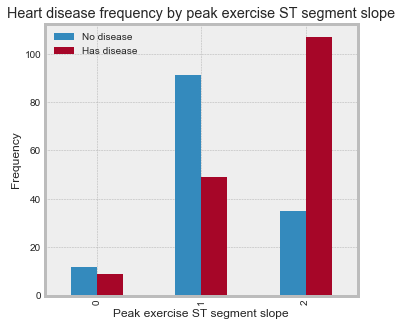

In [201]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(5,5), alpha = 1) 
plt.title('Heart disease frequency by peak exercise ST segment slope')
plt.xlabel('Peak exercise ST segment slope')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

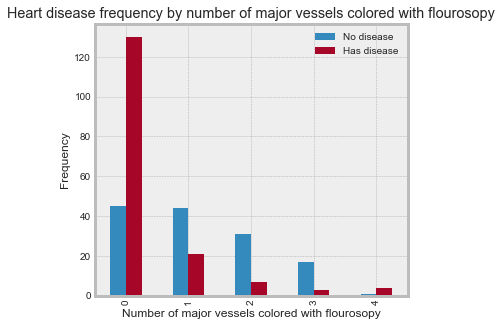

In [203]:
pd.crosstab(data.ca,data.target).plot(kind="bar",figsize=(5,5), alpha = 1) 
plt.title('Heart disease frequency by number of major vessels colored with flourosopy')
plt.xlabel('Number of major vessels colored with flourosopy')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

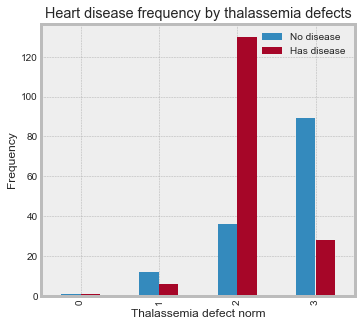

In [214]:
pd.crosstab(data.thal,data.target).plot(kind="bar",figsize=(5,5), alpha = 1) 
plt.title('Heart disease frequency by thalassemia defects')
plt.xlabel('Thalassemia defect norm')
plt.ylabel('Frequency')
plt.legend(["No disease","Has disease"])
plt.show()

### Summary which variables are seeming to have an effect
1.Chest pain increases the probability for heart disease

2.Exercise induced angina decreases probability for heart disease

3.Peak exercise ST segment slope increases probability for heart disease

4.Risk for heart disease is high if no major vessels are colored with flourosopy

5.Risk for heart disease is high if fixed thalassemia defects occur

### Visulalization with pairplot
Plots where two discrete variables are compared to each other does not make sence since the plot would only have dots on top of each other which is not readable.

From the plots it can same correlations can be seen as from the earlier plots.

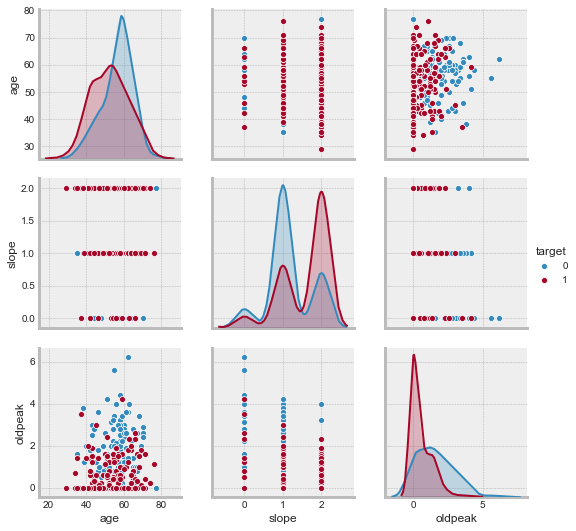

In [238]:
sns.pairplot(data , hue = 'target' ,
             vars = ['age'  , 'slope' , 'oldpeak'] )
plt.show()